# Predicting House Prices

## 1. Import Libraries

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print('Libraries imported!')

Libraries imported!


In [106]:
#read train dataset
pd.set_option('display.max_columns', None)
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', delimiter=',')
df_train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Set the 'id' of the train dataset as the index of the dataframe

In [107]:
df_train= df_train.set_index('Id')

#view the shape of the train data
df_train.shape

(1460, 80)

In [108]:
#check the data types of each column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Data Cleaning

We can see that some columns have missing values. Let's obtain a statistical summary of the dataframe before we go ahead to deal with the missing values

In [109]:
#obtain a statistical summary of the dataframe
pd.set_option('display.max_columns', None)
df_train.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,

### 2b. Deal with missing values

Let's go ahead to deal with the mssing values. First, let's identify which of the rows in the 19 columns (earlier identified) have the missing values

In [110]:
#identify missing values/columns
pd.set_option('display.max_columns', None)

missing_data= df_train.isnull() 
missing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False


Let's create a dataframe of columns/independent variables where there are missing data so we can have an idea of the number of missing values per column

In [111]:
pd.set_option('display.max_rows', None)
df_missing= pd.isnull(df_train).sum().sort_values(ascending = False)
missing_data= pd.isnull(df_train).sum().sort_values(ascending = False).loc[pd.isnull(df_train).sum()!= 0].to_frame(name= 'Count')

missing_data

,Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [112]:
#drop some columns with really high missing values: PoolQC, MiscFeature ; which have only 7 and 54 data entries respectively

df_train.drop(columns=['PoolQC','MiscFeature'], inplace=True)
#reset the index numbering
df_train.reset_index(drop=True, inplace=True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


let us confirm that those two columns have indeed been dropped. there should be 80-2= 78 columns

In [113]:
df_train.shape

(1460, 78)

In [114]:
#update the missing list after dropping the 2 columns
missing_data= pd.isnull(df_train).sum().sort_values(ascending = False).loc[pd.isnull(df_train).sum()!= 0].to_frame(name= 'Count')

We can also visualize the columns with missing values using a heatmap

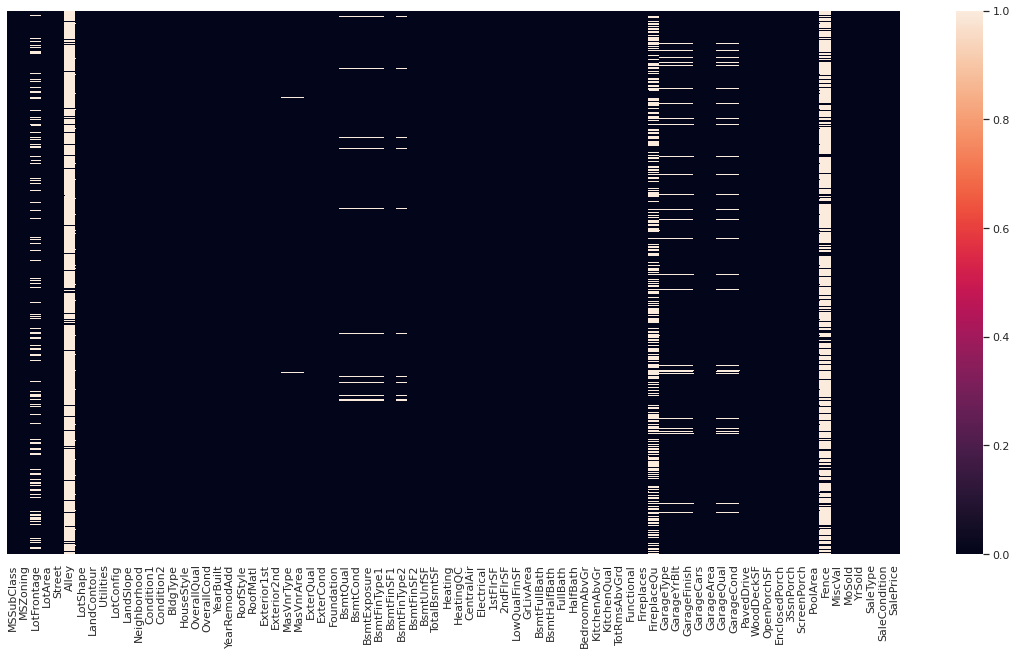

In [115]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(pd.isnull(df_train), yticklabels=False, cbar=True)
plt.show()

In [116]:
#let's check the data type of the columns with missing values to determine the next line of action
missing= missing_data.index.tolist()
df_train[missing].dtypes.head()

Alley           object
Fence           object
FireplaceQu     object
LotFrontage    float64
GarageType      object
dtype: object

Replace the float data types with the mean of the respective columns that they are in, also replace the object data types with the mode of the respective columns that they are in

In [117]:
missing_list= df_train [['LotFrontage','GarageYrBlt','MasVnrArea']]

for i in missing_list:
 df_train.loc[df_train.loc[:,i].isnull(),i]=df_train.loc[:,i].mean()

#check the updated missing list. only the object data types shuld be left
missing

['Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'GarageYrBlt',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

Replace the object data types with the mode of the respective columns

In [118]:
missinglist= df_train[['Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
 'BsmtQual', 'BsmtFinType1', 'BsmtCond', 'MasVnrType', 'Electrical']]

for i in missinglist:
 df_train.loc[df_train.loc[:,i].isnull(),i]=df_train.loc[:,i].mode()[0]

Check to be sure there are no missing values

In [119]:
df_train.isnull().sum().head()

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
dtype: int64

In [120]:
pd.isnull(df_train).sum().sort_values(ascending = False).loc[pd.isnull(df_train).sum()!= 0].to_frame(name= 'Count')

,Count


## 3. Data Exploration

Now that there are no more missing values, we can find the correlation values

### 3a. Correlation

In [121]:
#check how well the variable are correlated with each other
df_train.corr().head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


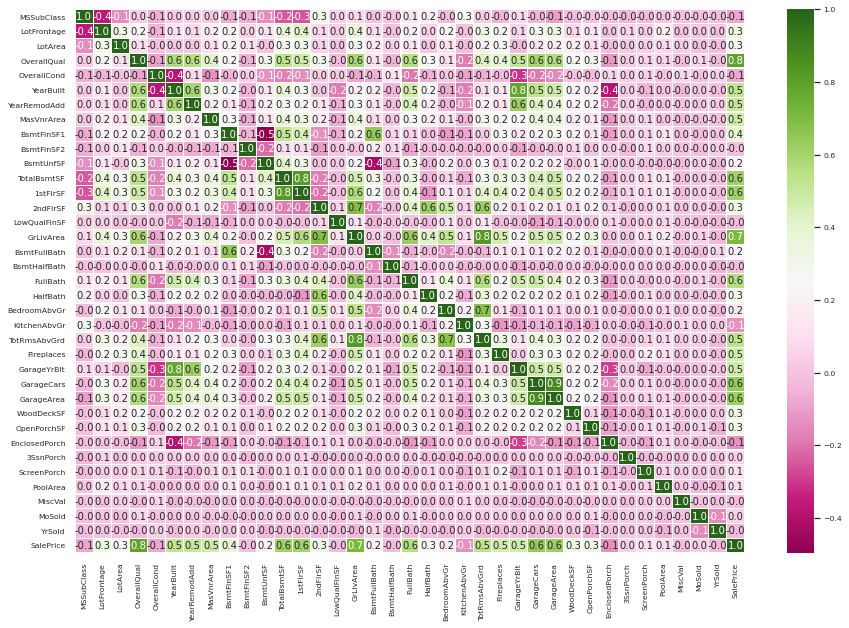

In [122]:
#visualize the correlation

correlation_train = df_train.corr()
sns.set(font_scale=0.7)
plt.figure(figsize=(15, 10))
ax = sns.heatmap(correlation_train, annot=True, annot_kws={'size': 10}, fmt='.1f', cmap='PiYG', linewidths=.2)
plt.show()

### Select variables with correlation >0.5

In [123]:
#let's make use of variables that have correlation of >0.5
price_corr= df_train.corr()['SalePrice'].loc[df_train.corr()['SalePrice']>=0.5].to_frame(name= 'Corr')
price_corr

,Corr
OverallQual,0.790982
YearBuilt,0.522897
YearRemodAdd,0.507101
TotalBsmtSF,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
FullBath,0.560664
TotRmsAbvGrd,0.533723
GarageCars,0.640409
GarageArea,0.623431


Update the x_train dataset to include only variables with corr >0.5.  We will visualize the correlation between the selected variables/predictors


In [124]:
#get the list of the index with corr value >0.5
corr_list= price_corr.index.tolist()

#extract this list from the x_train dataset
x_train1= df_train[corr_list]

they are all numerical data, hence, no need for one hot encoding (which is needed for categorical data).

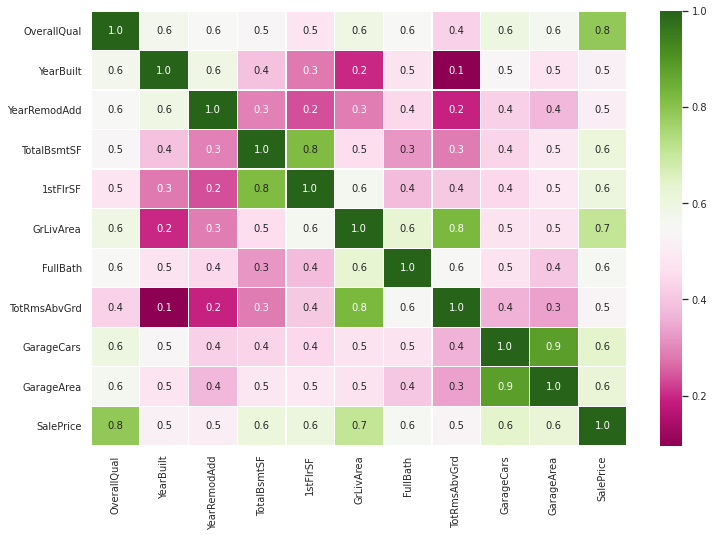

In [125]:
#visualize the correlation

correlation_train = x_train1.corr()
sns.set(font_scale=0.9)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(correlation_train, annot=True, annot_kws={'size': 10}, fmt='.1f', cmap='PiYG', linewidths=.2)
plt.show()

The following pairs are highly correlated:

* GarageArea and gararge Cars
* TotRmsAbvGrd and GrLivArea
* 1stFlrSF and TotalBsmtSF 

And of course, OverallQual and SalePrice.OverallQual has the highest +ve correlation(0.8) wit our target variable (SalePrice), followed by GrLivArea with 0.7. Followng closely are 1stFlrSF, TotalBsmtSF, GarageArea, GarageCars all with 0.6.


Let's go ahead to make individual distribution plot s of each variable to visualize how well they are correlated with on another. For ease, let's reduce the number of variables that will be plotted by incesing the correlation to 0.6.

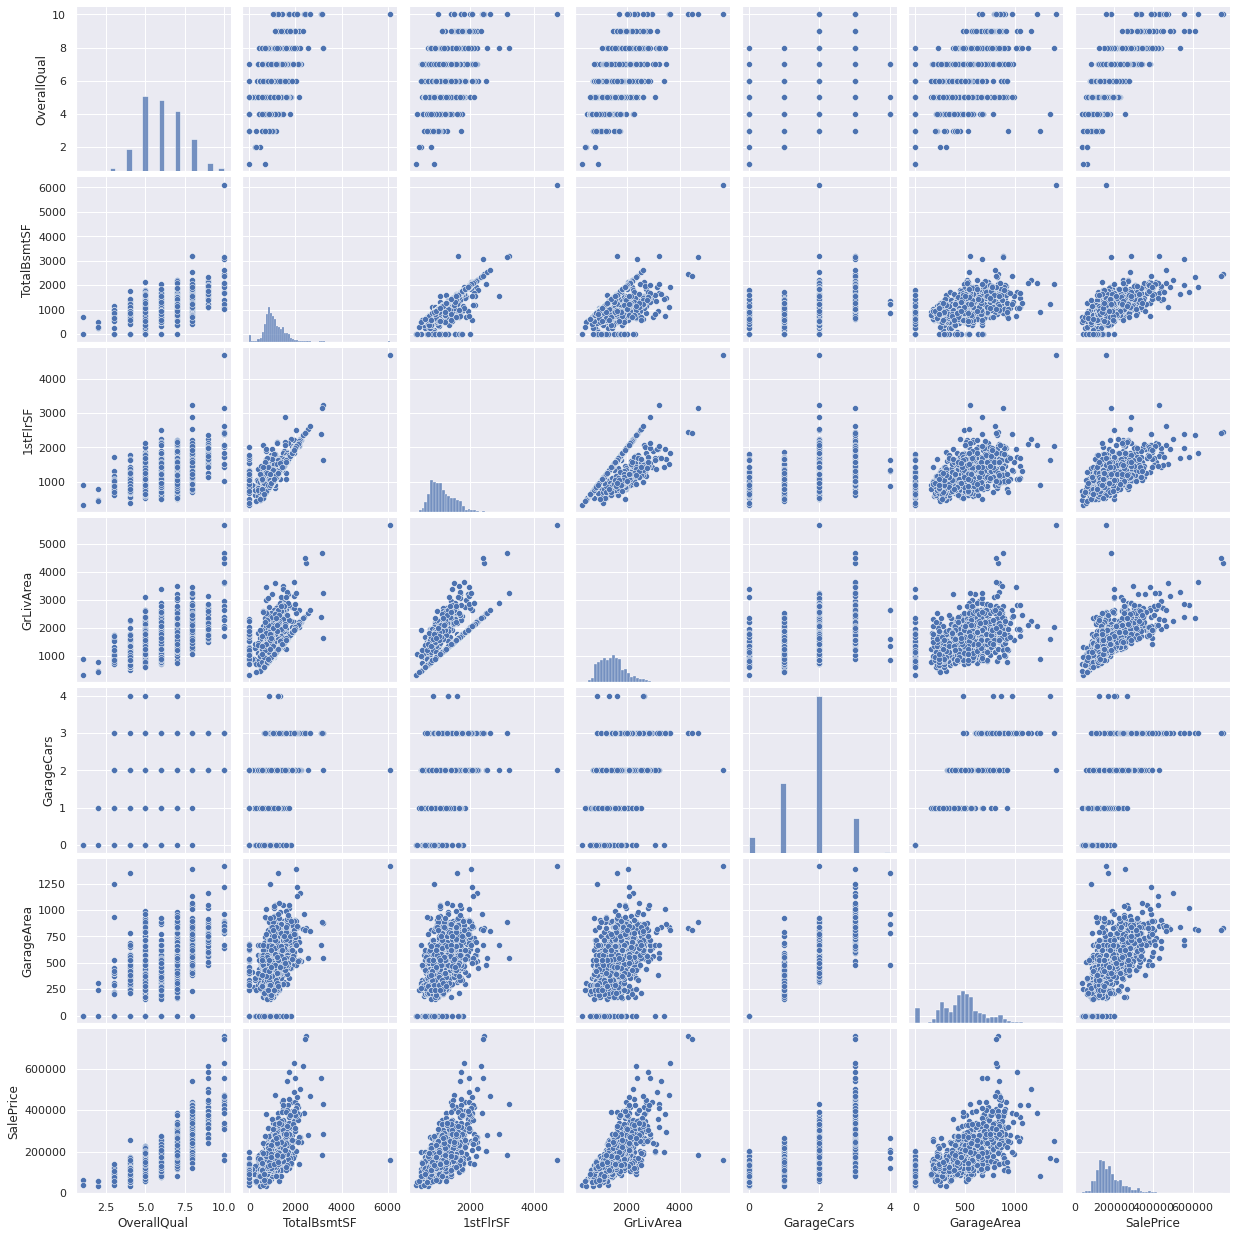

In [126]:
price_corr6= df_train.corr()['SalePrice'].loc[df_train.corr()['SalePrice']>=0.6].to_frame(name= 'Corr')
#get the list of the index with corr value >0.6
corr_list6= price_corr6.index.tolist()

#extract this list from the x_train dataset
train6= df_train[corr_list6]

#seaborn pairplot
sns.set()
pairp = sns.pairplot(train6)
plt.show()

### 3b. P-Value

Let's confirm that the correlation between these two variables is statistically significant. We will choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. If p-value is  <  0.001: we say there is strong evidence that the correlation is significant.

Lets calculate the Pearson Correlation Coefficient and P-value of OverallQual and SalePrice:

In [127]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(x_train1['OverallQual'], x_train1['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.7909816005838046  with a P-value of P = 2.185675268e-313


Conclusion:
Since the p-value is < 0.001, the correlation between OverallQual and SalePrice is statistically SIGNIFICANT, and the coefficient of ~ 0.79 shows that the relationship is QUITE STRONG.

Let's calculate the Pearson Correlation Coefficient and P-value of GrLivArea and SalePrice:

In [128]:
pearson_coef, p_value = stats.pearsonr(x_train1['GrLivArea'], x_train1['SalePrice'], )
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.7086244776126526  with a P-value of P = 4.518033646775835e-223


Conclusion:
Since the p-value is  <  0.001, the correlation between GrLivArea and Saleprice is statistically significant, and the linear relationship is moderately strong (~0.708).

Let's calculate the Pearson Correlation Coefficient and P-value of 1stFlrSF and SalePrice:

In [129]:
pearson_coef, p_value = stats.pearsonr(x_train1['1stFlrSF'], x_train1['SalePrice'], )
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6058521846919153  with a P-value of P = 5.394710618966377e-147


Conclusion: Since the p-value is < 0.001, the correlation between 1stFlrSF and Saleprice is statistically significant, and the linear relationship is moderate (~0.60).

Let's calculate the Pearson Correlation Coefficient and P-value of TotalBsmtSF and SalePrice:

In [130]:
pearson_coef, p_value = stats.pearsonr(x_train1['TotalBsmtSF'], x_train1['SalePrice'], )
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6135805515591948  with a P-value of P = 9.484229391515462e-152


Conclusion: Since the p-value is < 0.001, the correlation between TotalBsmtSF and Saleprice is statistically significant, and the linear relationship is moderate (~0.61).

Let's calculate the Pearson Correlation Coefficient and P-value of GarageCars and SalePrice:

In [131]:
pearson_coef, p_value = stats.pearsonr(x_train1['GarageCars'], x_train1['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6404091972583525  with a P-value of P = 2.4986441671769537e-169


Conclusion: Since the p-value is < 0.001, the correlation between GarageCars and Saleprice is statistically significant, and the linear relationship is moderately strong (~0.64).

Let's calculate the Pearson Correlation Coefficient and P-value of GarageArea and SalePrice:

In [132]:
pearson_coef, p_value = stats.pearsonr(x_train1['GarageArea'], x_train1['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6234314389183601  with a P-value of P = 5.2650381679915724e-158


Conclusion: Since the p-value is < 0.001, the correlation between GarageArea and Saleprice is statistically significant, and the linear relationship is moderately strong (~0.62).

#### ****Conclusion****: 

We have now explored the dataset and  we know the variables that are highly correlated to the SalePrice, and that are also statistically significant. They are:
1. OverallQuall
2. GrLivArea
3. GarageCars
4. GarageArea
5. 1stFlrSF
6. TotalBsmtSF

## 4. Test Data

Apply the cleaning and data refining you applied to the train dataset to the test data set as well

In [133]:
#read test data
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', delimiter=',')
df_test= df_test.set_index('Id') #set the id column to be the index
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [134]:
df_test.shape

(1459, 79)

In [135]:
#obtain a statistical summary of the dataframe
pd.set_option('display.max_columns', None)
df_test.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1458,1458,1443,1444.000000,1459,1459,1459,1415,1414,1415,1417,1458.000000,1417,1458.000000,1458.000000,1458.000000,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458,1459.000000,1457,1459.00000,729,1383,1381.000000,1381,1458.000000,1458.000000,1381,1381,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,5,NaN,NaN,2,2,4,4,1,5,3,25,9,5,5,7,NaN,NaN,NaN,NaN,6,4,13,15,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,4,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,4,5,3,NaN,NaN,NaN,NaN,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,1114,NaN,NaN,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,NaN,NaN,NaN,NaN,1169,1442,510,510,878,NaN,892,1256,661,634,1295,951,431,NaN,1237,NaN,NaN,NaN,1446,752,1358,1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757,NaN,1357,NaN,364,853,NaN,625,NaN,NaN,1293,1328,1301,NaN,NaN,NaN,NaN,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078821,5.553804,1971.357779,1983.662783,NaN,NaN,NaN,NaN,NaN,100.709141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.203704,NaN,52.619342,554.294925,1046.117970,NaN,NaN,NaN,NaN,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,NaN,6.385195,NaN,0.58122,NaN,NaN,1977.721217,NaN,1.766118,472.768861,NaN,NaN,NaN,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436812,1.113740,30.390071,21.130467,NaN,NaN,NaN,NaN,NaN,177.625900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.268042,NaN,176.753926,437.260486,442.898624,NaN,NaN,NaN,NaN,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,NaN,1.508895,NaN,0.64742,NaN,NaN,26.431175,NaN,0.775945,217.048611,NaN,NaN,NaN,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.00000,NaN,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000

### Deal with missing values

In [136]:
#identify missing values/columns
pd.set_option('display.max_columns', None)
missing_data1= df_test.isnull()

df_missing1= pd.isnull(df_test).sum().sort_values(ascending = False)
missing_data1= pd.isnull(df_test).sum().sort_values(ascending = False).loc[pd.isnull(df_test).sum()!= 0].to_frame(name= 'Count')


missing_data1.head()

,Count
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730


In [137]:
#drop some columns with really high missing values: PoolQC, MiscFeature 
df_test.drop(columns=['PoolQC','MiscFeature'], inplace=True)
#reset the index numbering
#df_test.reset_index(drop=True, inplace=True)


#update the missing list after dropping the 2 columns
missing_data1= pd.isnull(df_test).sum().sort_values(ascending = False).loc[pd.isnull(df_test).sum()!= 0].to_frame(name= 'Count')

In [138]:
#check the datatypes
#let's check the data type of the columns with missing values to determine the next line of action
missing1= missing_data1.index.tolist()
df_test[missing1].dtypes

Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageFinish     object
GarageCond       object
GarageYrBlt     float64
GarageQual       object
GarageType       object
BsmtCond         object
BsmtExposure     object
BsmtQual         object
BsmtFinType1     object
BsmtFinType2     object
MasVnrType       object
MasVnrArea      float64
MSZoning         object
Functional       object
BsmtFullBath    float64
BsmtHalfBath    float64
Utilities        object
GarageCars      float64
KitchenQual      object
BsmtUnfSF       float64
BsmtFinSF2      float64
GarageArea      float64
BsmtFinSF1      float64
TotalBsmtSF     float64
SaleType         object
Exterior2nd      object
Exterior1st      object
dtype: object

In [139]:
#Replace the float data types with the mean of the respective columns that they are in
missing_list1= df_test [['LotFrontage','GarageYrBlt','MasVnrArea','BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF2','GarageArea','BsmtFinSF1', 'TotalBsmtSF' ]]

for i in missing_list1:
 df_test.loc[df_test.loc[:,i].isnull(),i]=df_test.loc[:,i].mean()


In [140]:
#check the updated missing list. only the object data types shuld be left
missing1

#Replace the object data types with the mode of the respective columns

missinglist1= df_train[missing1]

for i in missinglist1:
 df_test.loc[df_test.loc[:,i].isnull(),i]=df_test.loc[:,i].mode()[0]

#confirm that there are no missing values
df_test.isnull().sum().head()

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
dtype: int64

In [141]:
df_test.shape

(1459, 77)

In [142]:
#there is no 'SalePrice', so the df_test dataswt is the predictor

x_test = df_test

## 5. Model Development

In [143]:
#place the target data in a separate dataframe
y_train= df_train[['SalePrice']]

#drop the target data
x_train =df_train.drop('SalePrice',axis=1)

In [144]:
#let's split the data ahead of our modelling. We'll use x_test1 and y_test1 because we also have another set of test data which we are about to import and clean

#from sklearn.model_selection import train_test_split
#x_train,x_test1,y_train,y_test1 = train_test_split(x_train, y_train,test_size=0.3,random_state=0)

#print("number of test samples :", x_test1.shape[0])
#print("number of training samples:",x_train.shape[0])

### 5a.  One hot encoding

we need to apply one hot encoding to the categorical variables in x_train and x_test

In [145]:
datatype=x_train.dtypes.to_frame(name= 'type')
datatype_test= x_test.dtypes.to_frame(name= 'type')

In [146]:
datatype

,type
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object


In [147]:
#obtain a list of the object datatype
objectss= datatype.loc[datatype['type'] == 'object']
objects= objectss.index.tolist()

objectss_test= datatype_test.loc[datatype_test['type'] == 'object']
objects_test= objectss_test.index.tolist()

In [148]:
#save the object datatypes in a variable called features

features= x_train[objects]

features_test = x_test[objects_test]

In [149]:
# one hot encoding to convert categorical features into a numeric format suitable for linear models
features_onehot = pd.get_dummies(features)

features_onehot_test= pd.get_dummies(features_test)

In [150]:
features_onehot.shape

(1460, 245)

In [151]:
features_onehot_test.shape

(1459, 229)

In [152]:
#put aside the x_train variables that are of int and float datatypes
noobjectss= datatype.loc[datatype['type'] != 'object']
notobjects= noobjectss.index.tolist()
features_num= x_train[notobjects]


#put aside the x_test variables that are of int and float datatypes
noobjectss_test= datatype_test.loc[datatype_test['type'] != 'object']
notobjects_test= noobjectss_test.index.tolist()
features_num_test= x_test[notobjects_test]


features_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [198]:
features_num_test.shape

(1459, 36)

In [199]:
features_num.shape

(1460, 36)

In [153]:
#merge the numerical dataset and the categorical dataset
x_train_new= pd.concat([features_num, features_onehot], axis= 1)

x_test_new= pd.concat([features_num_test, features_onehot_test], axis= 1)

In [154]:
x_train_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,Garage

In [155]:
x_train = x_train_new

x_test = x_test_new

In [156]:
x_test.shape

(1459, 265)

In [157]:
x_train.shape

(1460, 281)

In [158]:
#split the test data for the initial prediction
#split the data

from sklearn.model_selection import train_test_split
x_train,x_test1,y_train,y_test1 = train_test_split(x_train, y_train,test_size=0.3,random_state=0)

print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 438
number of training samples: 1022


### 5b. Model Selection

Let's fit the data on different models, then we compare the R2 and select the best model

### a. Simple Linear Regression

We have previously identified OverallQual as being the predictor with the highest correlation to SalePrice,also with a statistically significant relationship. Let's see if OverallQual can help us predict SalePrice successfully.

In [159]:
#fit the model using OverallQual
lm = LinearRegression()
lm.fit(x_train[['OverallQual']],y_train)

#output a prediction using train data
yhat_train=lm.predict(x_train[['OverallQual']])
yhat_train[0:5] 

array([[222133.37340859],
       [177009.90728364],
       [131886.44115869],
       [177009.90728364],
       [ -3483.95721615]])

In [160]:
#output a prediction using test data
yhat=lm.predict(x_test1[['OverallQual']])
yhat[0:5] 

array([[177009.90728364],
       [177009.90728364],
       [131886.44115869],
       [222133.37340859],
       [177009.90728364]])

Visualize the model using a distribution plot: the distribution of the fitted values that result from the model and compare it to the distribution of the actual values. Let's perform some model evaluation using our training and testing data separately. 

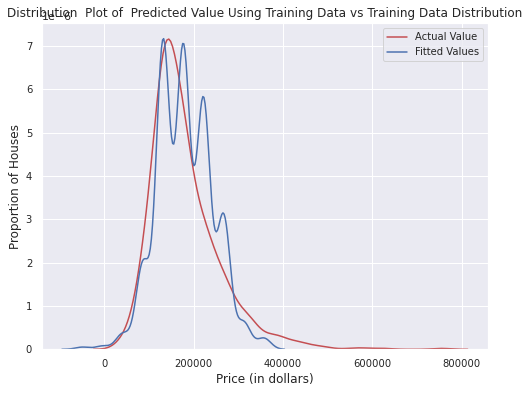

In [161]:
%matplotlib inline
width = 8
height = 6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_train, hist=False, color='r', label="Actual Value")
sns.distplot(yhat_train, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution', fontsize= 12)
plt.xlabel('Price (in dollars)', fontsize= 12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
#plt.ylim([-1.0, 8.0])
plt.legend(loc="upper right", fontsize= 10)
plt.ylabel('Proportion of Houses', fontsize= 12)

plt.show()
plt.close()

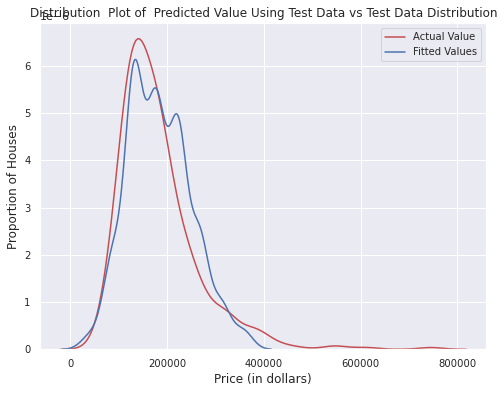

In [162]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test1, hist=False, color='r', label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution', fontsize= 12)
plt.xlabel('Price (in dollars)', fontsize= 12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
#plt.ylim([-1.0, 8.0])
plt.legend(loc="upper right", fontsize= 10)
plt.ylabel('Proportion of Houses', fontsize= 12)

plt.show()
plt.close()

Comparing both distribution plots; it is evident the distribution of the test data is much better at fitting the data. 

In [163]:
'The R2 on the train data is {}, while the R2 on the test data is {}'.format(lm.score(x_train[['OverallQual']],y_train),lm.score(x_test1[['OverallQual']],y_test1))

'The R2 on the train data is 0.6148865956730692, while the R2 on the test data is 0.6479214932363068'

We can see the R^2 of the test data is a bit smaller using the train data.

In [164]:
'The intercept is {}, while the coefficient is {}'.format(lm.intercept_, lm.coef_)

'The intercept is [-93730.88946604], while the coefficient is [[45123.46612495]]'

#### Residual Plot
A good way to visualize the variance of the data is to use a residual plot. A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis. - If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data; because randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

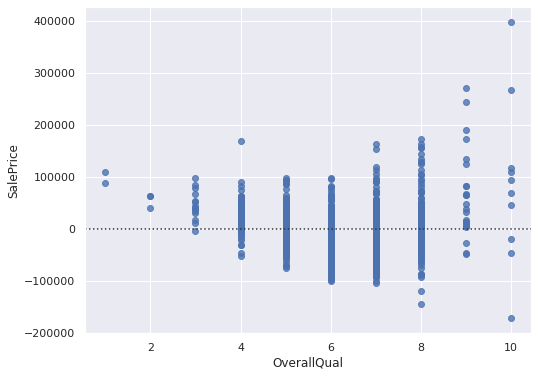

In [165]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x_train[['OverallQual']],y_train)
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data. Let's go ahead to introduce the remaining predictors into the model

### b. Multiple Linear Regression- with 6 predictors

In [166]:
#fit the model using the six predictors that were previously identified as having high correlations with SalePrice
lre = LinearRegression()
lre.fit(x_train[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea','1stFlrSF','TotalBsmtSF']],y_train)

#output a prediction
yhat1=lre.predict(x_test1[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea','1stFlrSF','TotalBsmtSF']])
yhat1[0:5] 

array([[274328.62088169],
       [156224.96672056],
       [118332.19966857],
       [231495.46406152],
       [120426.6553484 ]])

Let's take the first five predicted values and compare it to the actual targets.

In [167]:
print("Predicted values:", yhat1[0:4])
print("True values:", y_test1[0:4].values)

Predicted values: [[274328.62088169]
 [156224.96672056]
 [118332.19966857]
 [231495.46406152]]
True values: [[200624]
 [133000]
 [110000]
 [192000]]


In [168]:
lre_train_score= lre.score((x_train[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea','1stFlrSF','TotalBsmtSF']]),y_train)
lre_test_score= lre.score((x_test1[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea','1stFlrSF','TotalBsmtSF']]),y_test1)


'The R2 on the train data is {}, while the R2 on the test data is {}'.format(lre_train_score,lre_test_score)

'The R2 on the train data is 0.786966743695849, while the R2 on the test data is 0.6935457068634328'

We can see the R^2 of the test data is a bit smaller using the train data.

Visualize the model using a distribution plot: the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

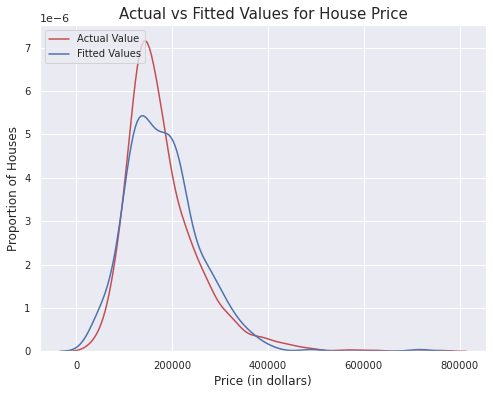

In [169]:
%matplotlib inline
width = 8
height = 6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_train, hist=False, color='r', label="Actual Value")
sns.distplot(yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for House Price', fontsize= 15)
plt.xlabel('Price (in dollars)', fontsize= 12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
#plt.ylim([-1.0, 8.0])
plt.legend(loc="upper left", fontsize= 10)
plt.ylabel('Proportion of Houses', fontsize= 12)

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

### c. Multiple Linear Regression- with all predictors

In [170]:
#fit the model using the six predictors that were previously identified as having high correlations with SalePrice
lre1 = LinearRegression()
lre1.fit(x_train,y_train)

#output a prediction
yhat2=lre1.predict(x_test1)
yhat2[0:5] 

array([[280830.5686779 ],
       [144677.58668518],
       [112106.51744652],
       [214519.83912659],
       [ 98696.97343445]])

In [171]:
'The R2 on the train data is {}, while the R2 on the test data is {}'.format(lre1.score(x_train, y_train),lre1.score(x_test1, y_test1))

'The R2 on the train data is 0.9472427642779018, while the R2 on the test data is -923760.6221163605'

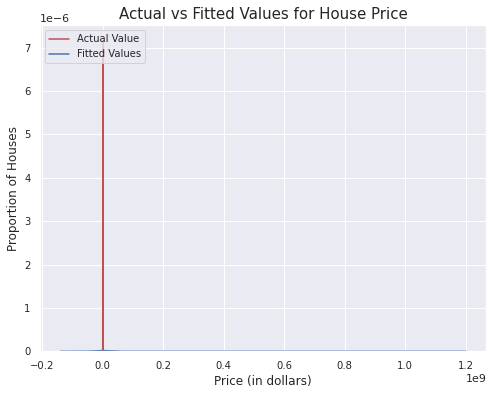

In [172]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_train, hist=False, color='r', label="Actual Value")
sns.distplot(yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for House Price', fontsize= 15)
plt.xlabel('Price (in dollars)', fontsize= 12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
#plt.ylim([-1.0, 8.0])
plt.legend(loc="upper left", fontsize= 10)
plt.ylabel('Proportion of Houses', fontsize= 12)

plt.show()
plt.close()

From the R^2 values and the distribution plot, we can see that directly using all predictors to develop a model was not successful, so we have to transform our data. Let's also see if we can try fitting a polynomial model to the data instead.

### d. Pipeline

With pipeline, we can normalize the data, perform a transform and fit the model simultaneously.

In [173]:
#create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)

#use the pipeline
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [174]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(x_test1)
ypipe[0:5]

array([[211204.07766944],
       [131440.71021934],
       [132341.10624799],
       [195734.72853256],
       [166318.61560997]])

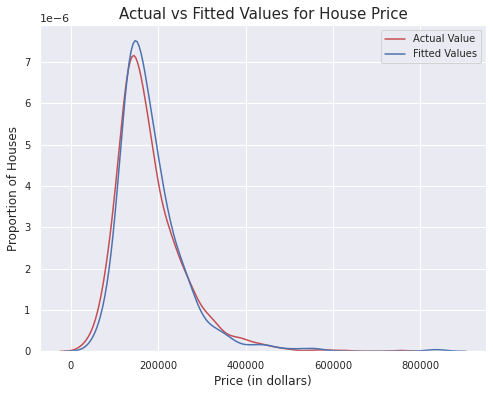

In [175]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_train, hist=False, color='r', label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for House Price', fontsize= 15)
plt.xlabel('Price (in dollars)', fontsize= 12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
#plt.ylim([-1.0, 8.0])
plt.legend(loc="upper right", fontsize= 10)
plt.ylabel('Proportion of Houses', fontsize= 12)

plt.show()
plt.close()

We can see that the fitted values are very close to the actual values.

### e. Ridge regression using GridSearch

Let's use sklearn, with the class GridSearchCV, to find the best Alfa (an hyperparameter)

In [176]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

#Create a ridge regions object
RR=Ridge()

#Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

#fit the model
Grid1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [177]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

#Create a ridge regions object
RR=Ridge()

#Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

#fit the model
Grid1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

Obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [178]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10)

We now test our model on the test data

In [179]:
BestRR.score(x_test1, y_test1)

0.7810619237116103

In [180]:
from sklearn.metrics import r2_score

pred_train_rr= BestRR.predict(x_train)
print('The root mean square error for prediction with the train data is {}'. format(np.sqrt(mean_squared_error(y_train,pred_train_rr))))
print('The R2 on the train data is {}'.format(r2_score(y_train, pred_train_rr)))

The root mean square error for prediction with the train data is 22157.518512282586
The R2 on the train data is 0.9195122542958235


In [181]:
pred_test_rr= BestRR.predict(x_test1)
print('The root mean square error for prediction with the test data is {}'. format(np.sqrt(mean_squared_error(y_test1,pred_test_rr))))
print('The R2 on the test data is {}'.format(r2_score(y_test1, pred_test_rr)))

The root mean square error for prediction with the test data is 38553.45284177278
The R2 on the test data is 0.7810619237116103


## 6. Measures for in-sample Evaluation

Although, we have calculated and compared the R^2 value of both the train and test data for all 4 models, let's focus on the R^2 values of the test data. 

We will also calculate the MSE. The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

In [182]:
print('The R2 on the test data is {}'.format(lm.score(x_test1[['OverallQual']],y_test1)))

The R2 on the test data is 0.6479214932363068


We can say that ~ 64.79% of the variation of the sale price is explained by this simple linear model "Overall Qual".

In [183]:
mse = mean_squared_error(y_test1, yhat)
print('The mean square error of price and predicted value is: ', mse)
print('The root mean square error is: ', np.sqrt(mse))

The mean square error of price and predicted value is:  2390257968.965773
The root mean square error is:  48890.264562239514


### Model 2: Multiple Linear Regression- for 6 Predictors

In [184]:
'The R2 on the test data is {}'.format(lre_test_score)

'The R2 on the test data is 0.6935457068634328'

We can say that ~ 69.35 % of the variation of sale price is explained by this multiple linear regression, using 6 predictors

In [185]:
mse = mean_squared_error(y_test1, yhat1)
print('The mean square error of price and predicted value is: ', mse)
print('The root mean square error is: ', np.sqrt(mse))

The mean square error of price and predicted value is:  2080515573.1505435
The root mean square error is:  45612.66899832264


### Model 3: Multiple Linear Regression- for All Predictors

In [186]:
'The R2 on the test data is {}'.format(lre1.score(x_test1, y_test1))

'The R2 on the test data is -923760.6221163605'

In [187]:
mse = mean_squared_error(y_test1, yhat2)
print('The mean square error of price and predicted value is: ', mse)
print('The root mean square error is: ', np.sqrt(mse))

The mean square error of price and predicted value is:  6271409746038136.0
The root mean square error is:  79192232.86432916


### Model 4: Pipeline

In [188]:
#let’s import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score

r_squared = r2_score(y_test1, ypipe)
print('The R-square value is: ', r_squared)


The R-square value is:  0.6146141585424647


In [189]:
mse = mean_squared_error(y_test1, ypipe)
print('The mean square error of price and predicted value is: ', mse)
print('The root mean square error is: ', np.sqrt(mse))

The mean square error of price and predicted value is:  2616381179.123559
The root mean square error is:  51150.57359525462


### Model 5: RidgeRegression using GridSearchCV

In [190]:
pred_test_rr= BestRR.predict(x_test1)
print('The root mean square error for prediction with the test data is {}'. format(np.sqrt(mean_squared_error(y_test1,pred_test_rr))))
print('The R2 on the test data is {}'.format(r2_score(y_test1, pred_test_rr)))

The root mean square error for prediction with the test data is 38553.45284177278
The R2 on the test data is 0.7810619237116103


## 7. Decision Making: Determining a Good Model Fit

Let's take a look at the values for the different models. We will let go of Model 3 (Multiple Linear Regression- for All Predictors), which did not fit well at all.


Simple Linear Regression: Using Overall Qual as a Predictor Variable of sale Price.
* R-squared: 0.6479214932363068
* RMSE: 4.88 x 10^4

Multiple Linear Regression: Using 6 predictors to determine the sale Price.
* R-squared: 0.6935457068634328
* RMSE: 4.56 x 10^4

Pipeline: Using all predictors after normalization and transformation
* R-squared: 0.6146141585424647
* RMSE: 5.11 x 10^4

Ridge Regression using GridSearchCV
* R-squared: 0.7810619237116103
* RMSE: 3.85 x 10^4

The larger the RMSE, the larger the difference between the predicted and observed values, which means the worse a model fits the data. However, the smaller the MSE, the better the model, and the larger the R^2, the better the model. Ridge regression ticks both boxes as it has the smallest RMSE and the largest R-squared when compared to other models

## 8. House Prices Predictions using the Test Data

Using the linear model developed with pipeline, let's predict the prices of the houses in the test dataset. First, let's ensure the original train and test datasets have equal number of columns, especially after one data encoding. At the monemt, the train dataset had 281 columns, while the test dataset has 265 columns

In [191]:
a=x_test.columns.tolist()
b= x_train.columns.tolist()

result = set(b) - set(a) #check for the variables not common to both lists and assign them to 'result'
print(sorted(result))

['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Utilities_NoSeWa']


In [192]:
data= [0]*1459

for r in result:
    x_test[r]= data

In [193]:
yridge=BestRR.predict(x_test)
yridge[0:5]

array([[ 81727.15877205],
       [117372.80330298],
       [131613.2313909 ],
       [123784.06261914],
       [153289.06258168]])

In [194]:
PredictedPrice= x_test.index.to_frame()

PredictedPrice['SalePrice']= yridge

PredictedPrice= PredictedPrice.set_index('Id')

PredictedPrice.head()

,SalePrice
Id,
1461,81727.158772
1462,117372.803303
1463,131613.231391
1464,123784.062619
1465,153289.062582


In [ ]:
# Define functions to download as CSV
from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "price.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


# Download as CSV
create_download_link_csv(PredictedPrice,"Download my data","price.csv")